In [2]:
import pandas as pd

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [3]:
y = pd.read_csv("AAPL_quarterly_financials.csv")
y

,name,ttm,09/30/2023,06/30/2023,03/31/2023,12/31/2022,09/30/2022,06/30/2022,03/31/2022,12/31/2021,...,12/31/1987,09/30/1987,06/30/1987,03/31/1987,12/31/1986,09/30/1986,06/30/1986,03/31/1986,12/31/1985,09/30/1985
0,TotalRevenue,"383,285,000,000","89,498,000,000","81,797,000,000","94,836,000,000","117,154,000,000","90,146,000,000","82,959,000,000","97,278,000,000","123,945,000,000",...,"1,042,400,000","786,500,000","637,100,000","575,300,000","662,300,000","510,800,000","448,300,000","408,900,000","533,900,000","409,700,000"
1,\tOperatingRevenue,"383,285,000,000","89,498,000,000","81,797,000,000","94,836,000,000","117,154,000,000","90,146,000,000","82,959,000,000","97,278,000,000","123,945,000,000",...,"1,042,400,000","786,500,000","637,100,000","575,300,000","662,300,000","510,800,000","448,300,000","408,900,000","533,900,000","409,700,000"
2,CostOfRevenue,"214,137,000,000","49,071,000,000","45,384,000,000","52,860,000,000","66,822,000,000","52,051,000,000","47,074,000,000","54,719,000,000","69,702,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GrossProfit,"169,148,000,000","40,427,000,000","36,413,000,000","41,976,000,000","50,332,000,000","38,095,000,000","35,885,000,000","42,559,000,000","54,243,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OperatingExpense,"54,847,000,000","13,458,000,000","13,415,000,000","13,658,000,000","14,316,000,000","13,201,000,000","12,809,000,000","12,580,000,000","12,755,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,\tSellingGeneralAndAdministration,"24,932,000,000","6,151,000,000","5,973,000,000","6,201,000,000","6,607,000,000","6,440,000,000","6,012,000,000","6,193,000,000","6,449,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,\tResearchAndDevelopment,"29,915,000,000","7,307,000,000","7,442,000,000","7,457,000,000","7,709,000,000","6,761,000,000","6,797,000,000","6,387,000,000","6,306,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,\tDepreciationAmortizationDepletionIncomeState...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,\t\tDepreciationAndAmortizationInIncomeStatement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,\tOtherOperatingExpenses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
y.index = y.name

In [5]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [6]:
y.index = pd.to_datetime(y.index)

In [7]:
y.sort_index()

,BasicEPS
1985-09-30,NaN
1985-12-31,0.004
1986-03-31,0.002
1986-06-30,0.002
1986-09-30,NaN
...,...
2022-09-30,1.29
2022-12-31,1.89
2023-03-31,1.53
2023-06-30,1.27


In [58]:
import numpy as np
# CHECK IF NAS ARE NO DIVIDEND PERIOD
y = y.sort_index().fillna(0.)

# create a subset of y
common_time_index = pd.date_range(start='2004-01-01', end='2023-09-30', freq='Q')


y.index = pd.to_datetime(y.index)
y_subset = y.loc[common_time_index]
y_subset['BasicEPS'] = y_subset['BasicEPS'].interpolate()
y_subset

,BasicEPS
2004-03-31,0.002
2004-06-30,0.003
2004-09-30,0.0
2004-12-31,0.013
2005-03-31,0.013
...,...
2022-09-30,1.29
2022-12-31,1.89
2023-03-31,1.53
2023-06-30,1.27


# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [9]:
from pytrends.request import TrendReq

In [84]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ['iphone', 'samsung','new trends','used phones','NIVIDA','intel','UCLA','vedio games','dog']  
start_date = '2004-01-01'
end_date = '2024-09-30'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [85]:
df = df.resample("Q").mean()
df

,iphone,samsung,new trends,used phones,NIVIDA,intel,UCLA,vedio games,dog
date,,,,,,,,,
2004-03-31,0.000000,24.666667,97.333333,67.000000,84.000000,96.666667,90.000000,30.666667,66.666667
2004-06-30,0.000000,24.000000,89.333333,74.000000,71.333333,85.666667,87.000000,33.666667,61.666667
2004-09-30,0.000000,27.333333,90.333333,71.333333,70.666667,89.666667,79.000000,35.666667,63.666667
2004-12-31,0.000000,29.666667,83.666667,70.333333,88.666667,89.000000,85.333333,38.333333,63.666667
2005-03-31,0.000000,28.000000,94.000000,77.000000,79.000000,88.666667,88.333333,24.666667,69.000000
...,...,...,...,...,...,...,...,...,...
2023-03-31,47.666667,56.333333,41.666667,32.666667,9.666667,28.666667,42.333333,6.000000,82.666667
2023-06-30,44.666667,50.333333,38.000000,31.333333,9.666667,26.000000,30.000000,6.666667,82.000000
2023-09-30,54.333333,56.666667,35.666667,28.666667,10.333333,28.666667,29.666667,5.666667,86.000000


In [114]:

#ALIGN DATA
#temp = pd.concat([y, X],axis = 1).dropna()
#y = temp[["BasicEPS"]].copy()
#X = temp.iloc[:,1:].copy()

# 3.) Normalize all the X data

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
scaler = StandardScaler()

In [89]:
X_scaled = scaler.fit_transform(df)

In [90]:
# create a subset of x
X_scaled_subset = X_scaled[:-2]


# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [91]:
from sklearn.linear_model import Lasso

In [92]:
lasso = Lasso(alpha = .5)

In [93]:
lasso.fit(X_scaled_subset,y_subset)

Lasso(alpha=0.5)

In [99]:
coefficients = lasso.coef_

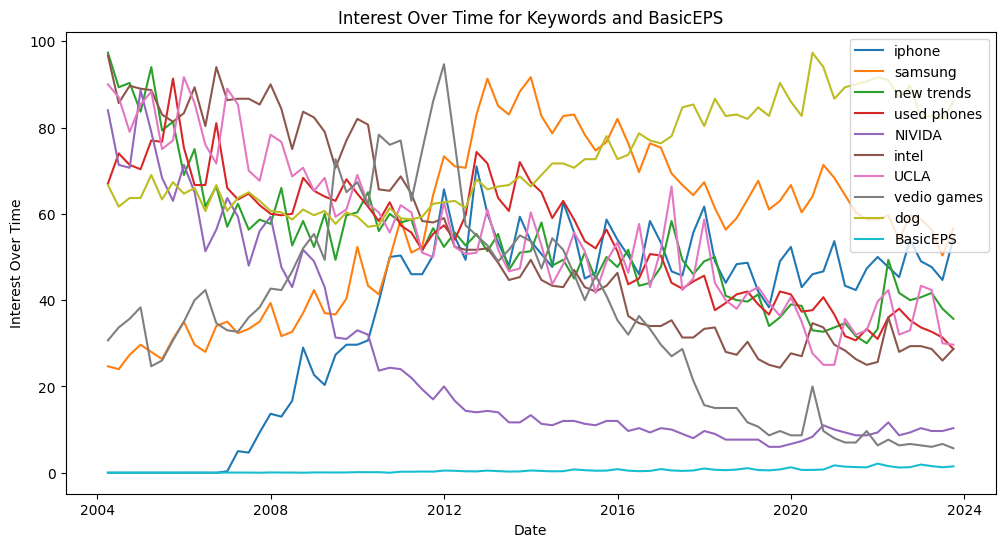

In [118]:
import matplotlib.pyplot as plt
df.index = pd.to_datetime(df.index)
df['BasicEPS'] = pd.to_numeric(df['BasicEPS'], errors='coerce')

# Drop rows with NaN values
df = df.dropna()

# Plot a curve for each keyword and 'BasicEPS' with different colors
plt.figure(figsize=(12, 6))
for keyword in keywords + ['BasicEPS']:
    plt.plot(df.index, df[keyword], label=keyword)

plt.xlabel('Date')
plt.ylabel('Interest Over Time')
plt.title('Interest Over Time for Keywords and BasicEPS')
plt.legend()
plt.show()

# 5.) Do these coefficient magnitudes make sense?

The magnitude of these coefficients indicates how hot they are, which hints at their relationship with the economy and even EPS, but on the scale they are so far removed from the data that it's hard to see the correlation